# K Nearest Neighbor Classification

Configure the project. Indeed you create a dataset in csv format.

In [1]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! mv Graduate.csv data.csv


Archive:  ./dataset/archive.zip
  inflating: Graduate.csv            
  inflating: play.csv                


Import needed libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import scikitplot as skplt

%matplotlib inline

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [3]:
df = pd.read_csv("data.csv")
df.head()
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,362,334,116,4,4.0,3.5,9.54,1,1
1,74,314,108,4,4.5,4.0,9.04,1,1
2,375,315,105,2,2.0,2.5,7.65,0,0
3,156,312,109,3,3.0,3.0,8.69,0,1
4,105,326,112,3,3.5,3.0,9.05,1,1


In [4]:
print(df.shape)
print("\n" + "#" * 80 + "\n")
print(df.columns)
print("\n" + "#" * 80 + "\n")
print(df.dtypes)

(500, 9)

################################################################################

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Admit'],
      dtype='object')

################################################################################

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Admit                  int64
dtype: object


In [5]:
df['Admit'].value_counts()

Admit
1    463
0     37
Name: count, dtype: int64

In [6]:
# summarize data
df.describe() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.926000
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.262033
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,1.000000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,1.000000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


Print the histogram chart of data

In [7]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Admit'],
      dtype='object')


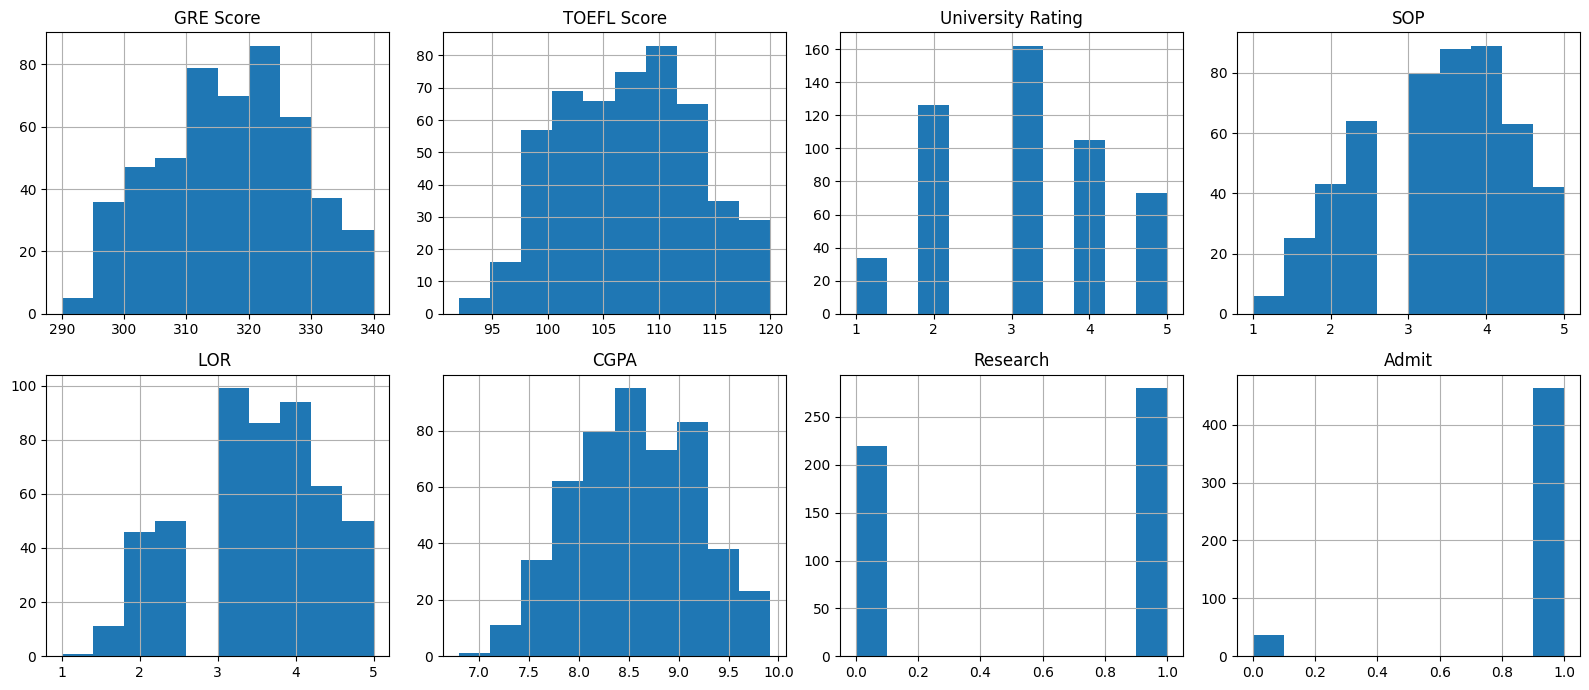

In [8]:
viz = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Admit']]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))

axes = axes.flatten()

for i, column in enumerate(viz.columns):
    viz[column].hist(ax=axes[i])
    axes[i].set_title(column)


plt.tight_layout()
plt.show()

In [9]:
# print(df)
train, test = train_test_split(df, test_size=0.20, random_state=42)
# test, evaluate = train_test_split(test, test_size=0.5, random_state=42)

# Preprocessing 

In [10]:
train_x = np.asanyarray(train[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']])
train_y = np.asanyarray(train['Admit'])

In [11]:
test_x = np.asanyarray(test[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']])
test_y = np.asanyarray(test['Admit'])

In [12]:
train_x = StandardScaler().fit(train_x).transform(train_x.astype(float))
test_x = StandardScaler().fit(test_x).transform(test_x.astype(float))

# Train Phase

In [13]:
k = 5
model = KNeighborsClassifier(n_neighbors=k).fit(train_x, train_y)
test_y_ = model.predict(test_x)

## Evaluation

In [14]:

print("Train Accuracy", accuracy_score(train_y, model.predict(train_x)))
print("Test Accuracy", accuracy_score(test_y, test_y_))

print("Test-set Precision", precision_score(test_y, test_y_))
print("Test-set Recall", recall_score(test_y, test_y_))
print("Test-set F1-Score", f1_score(test_y, test_y_))

Train Accuracy 0.9525
Test Accuracy 0.95
Test-set Precision 0.9484536082474226
Test-set Recall 1.0
Test-set F1-Score 0.9735449735449735


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.95      1.00      0.97        92

    accuracy                           0.95       100
   macro avg       0.97      0.69      0.76       100
weighted avg       0.95      0.95      0.94       100

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

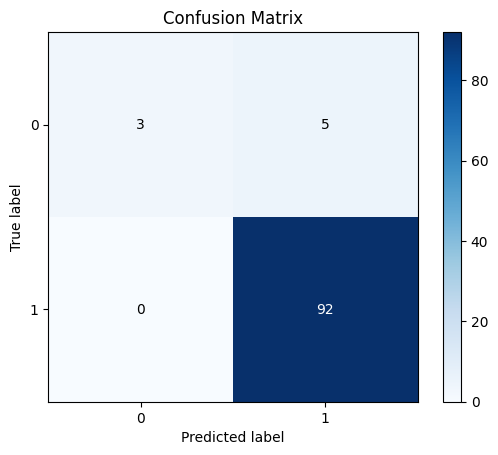

In [15]:
print("Logistic Regression Classification Report:")
print(classification_report(test_y, test_y_))

print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(test_y, test_y_)

For imbalanced data like the one you've provided, the F1-score is often a better metric for evaluation. This is because the F1-score considers both precision and recall, providing a balance between the two. In imbalanced datasets, precision and recall alone might not give a full picture of the model performance. 

In [17]:
best_f1score = 0
best_model = None

for k in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=k).fit(train_x, train_y)
    test_y_ = model.predict(test_x)
    f1score = f1_score(test_y, test_y_)

    if f1score > best_f1score:
        best_f1score = f1score
        best_model = model

print(f"Best f1-score: {best_f1score}")
print(f"Best Model: {best_model}")

Best f1-score: 0.9735449735449735
Best Model: KNeighborsClassifier(n_neighbors=3)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.95      1.00      0.97        92

    accuracy                           0.95       100
   macro avg       0.97      0.69      0.76       100
weighted avg       0.95      0.95      0.94       100

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

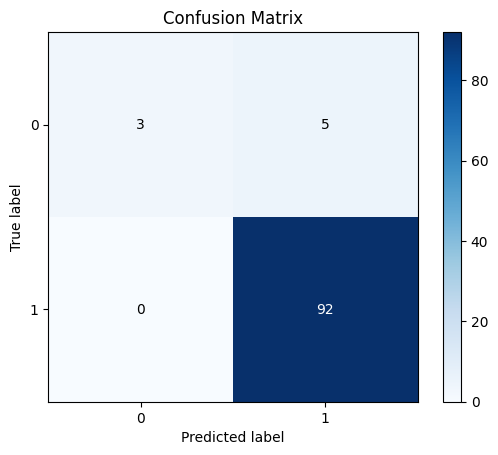

In [18]:
test_y_ = best_model.predict(test_x)

print("Logistic Regression Classification Report:")
print(classification_report(test_y, test_y_))

print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(test_y, test_y_)